### Setup packages 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=dd2651177c72bb74d028aaf18c29cbd8dc2dae124549c50e49ec4759bedfaea6
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 130 µs (started: 2022-06-20 10:59:00 +00:00)


In [ ]:
from plotnine import *
from plotnine.themes import *

time: 1.7 s (started: 2022-06-20 10:59:00 +00:00)


In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.6 s (started: 2022-06-20 10:59:02 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [ ]:
paper_name = "dgm_hestoncurriculum"

time: 834 µs (started: 2022-06-20 10:59:04 +00:00)


In [ ]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 380 ms (started: 2022-06-20 10:59:04 +00:00)


In [ ]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 7.39 ms (started: 2022-06-20 10:59:05 +00:00)


In [ ]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb


time: 2.79 s (started: 2022-06-20 10:59:05 +00:00)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px


time: 1.94 s (started: 2022-06-20 10:59:08 +00:00)


### Shared functions across models

In [ ]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu)
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point())

def plot_activation_mean(train_instance):
    
    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 20.8 ms (started: 2022-06-20 10:59:09 +00:00)


In [ ]:
# plot_report(train)
# plot_activation_mean(train)


time: 706 µs (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()


time: 1.19 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 33.7 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 81.4 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P
      
def bs_delta(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    if right == "C":
        return std_norm_cdf(d_1) 
    elif right == "P":
        return std_norm_cdf(d_1) - 1.0

def bs_gamma(K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    return std_norm_pdf(d_1)/(S*sigma*torch.sqrt(T)) 

def bs_theta(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    if right == "C":
        theta_call = (-S*std_norm_pdf(d_1)*sigma)/(2*torch.sqrt(T))-r*K*torch.exp(-r*T)*std_norm_cdf(d_2)
        return theta_call 
    elif right == "P":
        theta_put = (-S*std_norm_pdf(d_1)*sigma)/(2*torch.sqrt(T))+r*K*torch.exp(-r*T)*std_norm_cdf(-d_2)
        return std_norm_cdf(d_1) - 1.0        


time: 29.1 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 1.73 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.28 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 21.6 ms (started: 2022-06-20 10:59:10 +00:00)


In [ ]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 28.4 ms (started: 2022-06-20 10:59:10 +00:00)


### Heston options - sampling methodology


[Heston Model in terms of log price (not used)](https://www.frouah.com/finance%20notes/The%20Heston%20model%20short%20version.pdf)


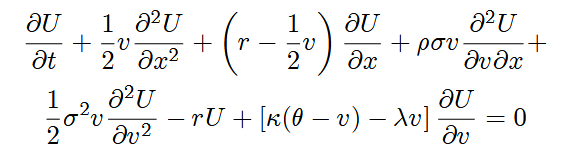



[Heston Model in terms of price ](https://www.frouah.com/finance%20notes/The%20Heston%20model%20short%20version.pdf)

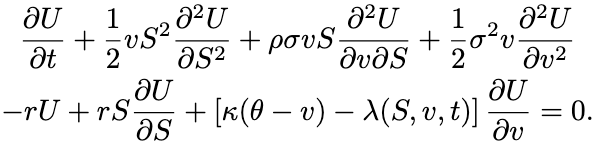


#### HestonOptionNet

In [ ]:
class HestonOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(HestonOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### time, nu (vol), log of the stock Px
        ### ( t , xi)
        self.Input = 2 + 1
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 12.9 ms (started: 2022-06-20 10:59:10 +00:00)


#### AlternativeNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class AlternativeNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(AlternativeNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)
        # return torch.pow(self.final_layer(s), 1)


time: 101 ms (started: 2022-06-20 10:59:10 +00:00)


#### EuropeanHestonSingleStockCurriculum

In [ ]:
import math

class EuropeanHestonSingleStockCurriculum():
    
    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.BS_SIGMA = 0.25  # BS Vol of Stock
        self.SIGMA = 0.25     # Vol of Vol (Yearly)
        self.RU = 1.0         # stock corrolation
        self.KAPPA = 0.25     # OU reversion coefficient
        self.THETA = 0.15     # long term mean of Vol of Vol
        self.RHO  = 0.75      # correlation of Vol and S
        self.LAMBDA = 0.5 # the price of risk
        
        self.K = 50.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        self.MAX_NU = 2.0
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        
        self.gamma = 0.0001
        self.beta = 0.0001

        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA*5.0)

        self.xbreaks = None
        self.tbreaks = None

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - self.K , torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( self.K - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.BS_SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 2 samples returned: internal, terminal
        # internal, boundary, initial, terminal

        if sample_method_X in ["U","U3"]:
            range_multiplier = 3.0 if sample_method_X == "U3" else 1.0
            # internal samples
            # x = self.to_device(torch.cat(( torch.rand([size,1])*self.T , -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ),to_cpu)
            x_internal_values = -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier
            nu_internal_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            t_internal_values = torch.rand([size,1])*self.T
            xvt_internal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal_values = -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier
            nu_terminal_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            t_terminal_values = torch.zeros(size, 1) + self.T
            xvt_terminal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            # ### initial time samples
            # x_initial_values = self.K*torch.ones( size, 1)
            # nu_initial_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            # t_initial_values = torch.zeros(size, 1)
            # xvt_initial = self.to_device(torch.cat( ( t_initial_values , nu_initial_values, x_initial_values ) , dim = 1 ),to_cpu)
            return xvt_internal , xvt_terminal #, xvt_initial


        if sample_method_X in ["ULP","ULPE3"] :
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # internal samples
            x_internal_values = torch.log(-self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier)
            nu_internal_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            t_internal_values = torch.rand([size,1])*self.T
            xvt_internal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal_values = torch.log(-self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier)
            nu_terminal_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            t_terminal_values = torch.zeros(size, 1) + self.T
            xvt_terminal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            ### initial time samples
            x_initial_values = torch.log(self.K*torch.ones( size, 1))
            nu_initial_values = -self.MAX_NU*range_multiplier*torch.rand([size, 1])+self.MAX_NU*range_multiplier
            t_initial_values = torch.zeros(size, 1)
            xvt_initial = self.to_device(torch.cat( ( t_initial_values , nu_initial_values, x_initial_values ) , dim = 1 ),to_cpu)

            return xvt_internal , xvt_terminal , xvt_initial
    
        if sample_method_X in ["LN", "LN5"]:
            ln_dist = self.log_normal_dist_5 if sample_method_X == "LN5" else self.log_normal_dist
            # internal samples
            x_internal_values = torch.log(torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])))
            nu_internal_values = -self.MAX_NU*torch.rand([size, 1])+self.MAX_NU
            t_internal_values = torch.rand([size,1])*self.T
            xvt_internal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            x_terminal_values = torch.log(torch.maximum(ln_dist.sample((size,)).reshape(-1,1)*self.K,torch.Tensor([0.0])))
            nu_terminal_values = -self.MAX_NU*torch.rand([size, 1])+self.MAX_NU
            t_terminal_values = torch.zeros(size, 1) + self.T
            xvt_terminal = self.to_device(torch.cat(( t_internal_values , nu_internal_values, x_internal_values ) , dim = 1 ),to_cpu)
            ### initial time samples
            x_initial_values = torch.log(self.K*torch.ones( size, 1))
            nu_initial_values = -self.MAX_NU*torch.rand([size, 1])+self.MAX_NU
            t_initial_values = torch.zeros(size, 1)
            xvt_initial = self.to_device(torch.cat( ( t_initial_values , nu_initial_values, x_initial_values ) , dim = 1 ),to_cpu)
            
            return xvt_internal , xvt_terminal , xvt_initial

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def criterion(self, x_internal , x_terminal , loss_transforms = [torch.square]):
        '''
        Loss function that helps network find solution to equation
        '''   
        d = torch.autograd.grad(
            self.net(x_internal), 
            x_internal, 
            grad_outputs=torch.ones_like(self.net(x_internal)) ,
            create_graph=True )
        dt  = d[0][:,0].reshape(-1,1)
        dv1 = d[0][:,1].reshape(-1,1)
        dx1 = d[0][:,2].reshape(-1,1)
        
        # d2u/dxdx
        # pdb.set_trace()
        dx1x1 = torch.autograd.grad(dx1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dx1) ,
                                    create_graph = True)[0][:,2].reshape(-1,1)

        # d2u/dvdv
        dv1v1 = torch.autograd.grad(dv1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dv1) ,
                                    create_graph = True, allow_unused=True)[0][:,1].reshape(-1,1)

        # d2u/dxdv
        dx1v1 = torch.autograd.grad(dx1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dx1) ,
                                    create_graph = True, allow_unused=True)[0][:,1].reshape(-1,1)
                            
        
        # dx1v1 = torch.tensor(torch.autograd.functional.hessian(self.net, tuple([x_internal[:,1], x_internal[:,2]])))
        # env_loss = loss_fn(env_outputs, env_targets)
        # total_loss += env_loss
        # env_grads = torch.autograd.grad(env_loss, params, retain_graph=True, create_graph=True)
        # print( env_grads[0] )
        # hess_params = torch.zeros_like(env_grads[0])
        # for i in range(env_grads[0].size(0)):
        #     for j in range(env_grads[0].size(1)):
        #         hess_params[i, j] = torch.autograd.grad(env_grads[0][i][j], params, retain_graph=True)[0][i, j] #  <--- error here
        # print( hess_params )
        # exit()

        if loss_transforms is None:
          loss_transforms = [torch.square]
        intC = None
        terC = None
        iniC = None

        if len(x_internal) == 0:
          # print('zero batch size for domain!')
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # pdb.set_trace()
          # x is above the free boundary ( so immediate pay-off is positive )

          # def bs_gamma(K, S, T, sigma, r):
          bs_gammas = bs_gamma( self.K*torch.ones( x_internal.shape[0], 1).to(x_internal.device), 
                                x_internal[:,2], 
                                x_internal[:,0],
                                # torch.sqrt(x_internal[:,1]).to(x_internal.device), 
                                self.BS_SIGMA*torch.ones( x_internal.shape[0], 1).to(x_internal.device),                                 
                                self.R*torch.ones( x_internal.shape[0], 1).to(x_internal.device)).to(x_internal.device)

          # Equation 5 in https://www.frouah.com/finance%20notes/The%20Heston%20model%20short%20version.pdf but worked out for uo/u1
          intC_loss_untransformed = dt + 0.5*x_internal[:,1]*(x_internal[:,2]**2)*dx1x1 + \
                                    self.RHO*self.SIGMA*x_internal[:,1]*x_internal[:,2]*dx1v1 + \
                                    0.5*(self.SIGMA**2)*x_internal[:,1]*dv1v1 - \
                                    self.R*self.net(x_internal) + \
                                    self.R*x_internal[:,2]*dx1 + \
                                    ( self.KAPPA * (self.THETA - x_internal[:,1]) - self.LAMBDA*x_internal[:,1] )*dv1 +\
                                    0.5*(x_internal[:,1]-self.BS_SIGMA**2)*(x_internal[:,2]**2)*bs_gammas
                                    # 0.5*(x_internal[:,1]-self.BS_SIGMA**2)*(x_internal[:,2]**2)*bs_gammas  # if we use the same vol in BS we will end up with zero correction... 
          
          intC = [ loss_transform(intC_loss_untransformed) for loss_transform in loss_transforms ]

        # if torch.isnan(intC[0]):
        #   pdb.set_trace()
        #   pass


        # pdb.set_trace()
        # Terminal Condition - should be equal (both in- and out of the money)
        # terC = [ loss_transform( self.g(x_terminal) - self.net(x_terminal) ) for loss_transform in loss_transforms ]
        # g_terminal = self.g(x_terminal).to(x_terminal.device) # self.net(x_terminal)
        # u0_terminal = bs_price( "C" if self.is_call else "P", 
        #                         self.K*torch.ones( x_terminal.shape[0], 1).to(x_terminal.device), 
        #                         torch.exp(x_terminal[:,2]).to(x_terminal.device), 
        #                         self.T*torch.ones( x_terminal.shape[0], 1).to(x_terminal.device), 
        #                         x_terminal[:,1], 
        #                         self.R*torch.ones( x_terminal.shape[0], 1).to(x_terminal.device)).to(g_terminal.device)
        # terC = [ loss_transform( g_terminal - u0_terminal) for loss_transform in loss_transforms ]
        terC = [ loss_transform(self.net(x_terminal)) for loss_transform in loss_transforms ]

        # Initial Condition - should be equal (both in- and out of the money)
        # Time is time to maturity 
        # initial_px_est = self.net(x_initial).to(x_initial.device)
        # uT_initial = bs_price("C" if self.is_call else "P", 
        #                         self.K*torch.ones( initial_px_est.shape[0], 1).to(x_initial.device), 
        #                         self.K*torch.ones( initial_px_est.shape[0], 1).to(x_initial.device), 
        #                         self.T*torch.ones( initial_px_est.shape[0], 1).to(x_initial.device), 
        #                         x_initial[:,1], 
        #                         self.R*torch.ones( initial_px_est.shape[0], 1).to(x_initial.device)).to(initial_px_est.device)
        # iniC = [ loss_transform( initial_px_est - uT_initial) for loss_transform in loss_transforms ]
        # iniC = [ loss_transform(initial_px_est) for loss_transform in loss_transforms ]
        # closed_form_initial_pxs = bs_price("C" if self.is_call else "P", self.K, x_initial[:,1], x_initial[:,0], torch.Tensor([self.SIGMA]).to(initial_px_est.device), self.R ).to(initial_px_est.device)
        # iniC = loss_transform( initial_px_est - closed_form_initial_pxs )
        return  intC , terC #, iniC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x , x_terminal   = batch_x # x_initial# 
        x = Variable( x , requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms ) # , x_initial
        intC , terC  = Ls # iniC

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]))
            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]),  
                                    loss_equalWeightedByType ] )       # 1./numActive*torch.mean(iniC[lc]     
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] ) # , iniC.numpy()
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, loss_transforms = loss_transforms)
        intC , terC , iniC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            iniCt = self.weights[0,2] * torch.pow((1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * iniC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) )
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]), 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy()] )
        return return_losses

    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal , x_initial, x_nonzero = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_initial, loss_transforms = loss_transforms)
        intC , terC , iniC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])
        numActive = np.sum([1 if xb.numel()>0 else 0 for xb in batch_x ])

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            iniCt = self.weights[0,2] * (1.0/iniC[lc].numel() if iniC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * iniC[lc])) 
            loss_equalWeightedByType = (1./numActive*torch.mean(intC[lc]) + 1./numActive*torch.mean(terC[lc]) + 1./numActive*torch.mean(iniC[lc]) )
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt + iniCt)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intC[lc]) , 1./numActive*torch.mean(terC[lc]) , 1./numActive*torch.mean(iniC[lc]),  
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy(), iniC[lc].numpy()] )
        return return_losses

    

time: 855 ms (started: 2022-06-20 10:59:10 +00:00)


#### TrainEuropeanHestonSingleStockCurriculum

In [ ]:
class TrainEuropeanHestonSingleStockCurriculum():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        
    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        self.validation_losses = np.ones((epoch, 4*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 4*2 - 1  ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        optimizer = optim.SGD(self.net.parameters(), lr)
        # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2, losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal, losses_equalWeightedByType = losses_L2 # initial
            loss_abs , internal_abs , terminal_abs , losses_equalWeightedByType_abs = losses_ABS # initial_abs
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ])) # initial

            self.train_losses[e,:] = [ to_cpu_detach(loss), 
                                       to_cpu_detach(internal), to_cpu_detach(terminal), #  to_cpu_detach(initial),  
                                       to_cpu_detach(loss_abs), 
                                       to_cpu_detach(internal_abs), to_cpu_detach(terminal_abs), #to_cpu_detach(initial_abs), 
                                       to_cpu_detach(losses_equalWeightedByType_abs) ]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_validation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
                
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_validation)]
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            # scheduler.step(loss)
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))

                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                # self.history_initial.append( initial )

                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    # xinitial_res = self.model.net(xinitial).detach()

                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    # df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0) # df_initial
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0) # df_initial

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "Var", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample


    # def train_stratified(self , epoch , lr, 
    #                      eqLossFn = 'calculateLoss', 
    #                      sample_method_X = "U", 
    #                      key_loss_func = torch.square, 
    #                      huber_delta = 0.5
    #                      ):
        
    #     self.validation_losses = np.ones((epoch, 6*3 - 1), dtype='float32') * np.nan
    #     self.train_losses = np.ones((epoch, 6*2), dtype='float32') * np.nan

    #     optimizer = self.optimizer_used(self.net.parameters(), lr)
    #     # optimizer = optim.SGD(self.net.parameters(), lr)
    #     loss_avg = 0.0
    #     loss_calc_method = None
    #     try:
    #         loss_calc_method = getattr(self.model, eqLossFn)
    #     except AttributeError:
    #         raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
    #     for e in range(epoch):
    #         optimizer.zero_grad()
    #         internal_xts_bts, terminal_xts_bts, initial_xts_bts, nonzero_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
    #         validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
    #         training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
    #         training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
    #         # pdb.set_trace()
    #         for stratum_count in range(len(internal_xts_bts)):              
    #           # sample_batch = (internal_xts_bts[stratum_count,:,:], 
    #           #                 terminal_xts_bts[stratum_count,:,:], 
    #           #                 initial_xts_bts[stratum_count,:,:], 
    #           #                 nonzero_xts_bts[stratum_count,:,:])  
    #           sample_batch = (internal_xts_bts[stratum_count], 
    #                           terminal_xts_bts[stratum_count], 
    #                           initial_xts_bts[stratum_count], 
    #                           nonzero_xts_bts[stratum_count])  

    #           stratum_losses_L2, stratum_losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
    #           if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
    #             pdb.set_trace()
    #             pass
            
    #           if training_stratum_losses is not None:
    #             training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
    #           else:
    #             training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

    #           # pdb.set_trace()  
    #           training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

    #         # pdb.set_trace()              
    #         training_loss_for_epoch = torch.sum(training_stratum_losses,0)
    #         loss = training_value_to_optimize

    #         loss_optimized , internal , terminal , initial, nonzero, losses_equalWeightedByType, \
    #         loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = training_loss_for_epoch            
    #         max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

    #         self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

    #         if self.debug == True and (self.validation_sample is not None):
    #           losses_L2_validation, losses_ABS_validation, losses_Huber_validation = \
    #             loss_calc_method( self.validation_sample, 
    #                               loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
    #                               keep_batch = False )
    #           validation_loss = [*to_cpu_detach(losses_L2_validation),
    #                                           *to_cpu_detach(losses_ABS_validation),
    #                                           *to_cpu_detach(losses_Huber_validation)]
    #           validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
    #           self.validation_losses[e,:] = validation_loss

    #         if self.use_early_stop:
    #           loss_to_check = losses_equalWeightedByType
    #           if self.monitored_loss_type == "Train_L2":
    #             pass
    #           elif self.monitored_loss_type == "Train_L1":             
    #             loss_to_check = losses_equalWeightedByType_abs
    #           elif self.monitored_loss_type == "Train_MAXL2":             
    #             loss_to_check = max_loss_L2
    #           if loss_to_check < (self.best_loss-self.early_stop_delta):
    #             self.best_loss = loss_to_check
    #             self.early_stop_counter = 0
    #             # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
    #           else:
    #             self.early_stop_counter += 1
    #           if self.early_stop_counter>=self.early_stop_patience:
    #             print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
    #             break

    #         loss_avg = loss_avg + float(loss.item())
    #         loss.backward()

    #         optimizer.step()
    #         if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
    #             loss_avg = loss_avg/self.hook_interval
    #             print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
    #             # loss_avg = 0
    #             ## report detailed loss ## ## puting inside no grad??? for memory optimization!
    #             # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
    #             self.history_tl.append( loss_avg )
    #             self.history_internal.append( internal )
    #             self.history_terminal.append( terminal )
    #             self.history_initial.append( initial )
    #             self.history_nonzero.append( nonzero )
    #             if self.debug == True and (self.validation_sample is not None):
    #                 mean = []
    #                 for l in self.hooks:
    #                     mean.append(torch.mean( self.hooks[l] ).item())
    #                 self.history_mean_hooks.append( mean )
    #                 xinternal, xterminal, xinitial, xnonzero = self.validation_sample
    #                 xinternal_res = self.model.net(xinternal).detach()
    #                 xterminal_res = self.model.net(xterminal).detach()
    #                 xinitial_res = self.model.net(xinitial).detach()
    #                 xnonzero_res = self.model.net(xnonzero).detach()

    #                 # pdb.set_trace()
    #                 df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
    #                 df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
    #                 df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
    #                 df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
    #                 if self.history_surfaces_hooks is None:
    #                   self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
    #                 else:
    #                   self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

    #     self.stop_epoch = e





time: 542 ms (started: 2022-06-20 10:59:11 +00:00)


#### Test Case European Call - Standard Loss, Uniform sampling , NL=3, NN=30, lr = 0.01

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
# torch.autograd.grad(dx1, x_internal, grad_outputs=torch.ones_like(x_internal) , create_graph = True, allow_unused=True)
# torch.autograd.grad(dx1, x_internal, grad_outputs=torch.ones_like(x_internal) , create_graph = True)

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 0.001
net = HestonOptionNet( NL = 5 , NN = 100 )
# net = AlternativeNet(in_size=3, out_size=1, neurons=100, depth = 10)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
# heston_equation.xbreaks = np.linspace(0, heston_equation.MAX_X, 3).tolist()
# heston_equation.tbreaks = np.linspace(0, heston_equation.T, 3).tolist()
trainEuss = TrainEuropeanHestonSingleStockCurriculum( net , heston_equation, BATCH_SIZE = 2**5 , debug = True )
trainEuss.hook_interval = 100
# trainEuss.use_early_stop = True
# trainEuss.early_stop_patience = 100
# trainEuss.validation_sample = heston_equation.sample(sample_method_X="U", size=2**6)
# trainEuss.train_stratified( epoch = 4000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)
trainEuss.train(epoch = 4000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)

Epoch 0 - lr 0.001 -  key loss: 1212.52783203125 - eqWeighted loss: 1212.52783203125 - L1 loss 8.306964874267578 - Max Loss 1212.4638671875
Epoch 99 - lr 0.001 -  key loss: 153.86178588867188 - eqWeighted loss: 153.86178588867188 - L1 loss 3.089627265930176 - Max Loss 153.80235290527344
Epoch 199 - lr 0.001 -  key loss: 128.73268127441406 - eqWeighted loss: 128.73268127441406 - L1 loss 3.016728639602661 - Max Loss 128.64413452148438
Epoch 299 - lr 0.001 -  key loss: 148.32257080078125 - eqWeighted loss: 148.32257080078125 - L1 loss 3.332744598388672 - Max Loss 148.24676513671875
Epoch 399 - lr 0.001 -  key loss: 221.9593505859375 - eqWeighted loss: 221.9593505859375 - L1 loss 4.195493698120117 - Max Loss 221.89053344726562
Epoch 499 - lr 0.001 -  key loss: 691.276123046875 - eqWeighted loss: 691.276123046875 - L1 loss 7.9931254386901855 - Max Loss 691.2214965820312
Epoch 599 - lr 0.001 -  key loss: 212.6368865966797 - eqWeighted loss: 212.6368865966797 - L1 loss 5.079169273376465 - Max

In [ ]:
from pprint import pprint as pp
# def bs_price(right, K, S, T, sigma, r)
pp ( bs_price("C", 
         torch.tensor(heston_equation.K), 
         torch.tensor(heston_equation.K*1.0), 
         torch.tensor(0.5), 
         torch.tensor(heston_equation.BS_SIGMA), 
         torch.tensor(heston_equation.R) ) )

net_cpu = trainEuss.model.net.cpu()
net_cpu.eval()
net_cpu(torch.tensor([[0.5, heston_equation.BS_SIGMA*heston_equation.BS_SIGMA, heston_equation.K*1.0   ]]))

tensor(4.1300)


tensor([[0.3514]], grad_fn=<AddmmBackward0>)

time: 33.5 ms (started: 2022-06-20 11:02:04 +00:00)


In [ ]:
pp(heston_equation.K)
pp(heston_equation.BS_SIGMA)

50.0
0.25
time: 973 µs (started: 2022-06-20 11:02:10 +00:00)


### Hessian Test

In [ ]:
# import numpy as np
# import torch, torchvision
# from torch.autograd import Variable, grad
# import torch.distributions as td
# import math
# from torch.optim import Adam
# import scipy.stats

# x_data = torch.randn(100)+0.0 # observed data (here sampled under H0)
# N = x_data.shape[0] # number of observations
# mu_null = torch.zeros(1)
# sigma_null_hat = Variable(torch.ones(1), requires_grad=True)

# def log_lik(mu, sigma):
#   return td.Normal(loc=mu, scale=sigma).log_prob(x_data).sum()

# # Find theta_null_hat by some gradient descent algorithm (in this case an closed-form expression would be trivial to obtain (see below)):
# opt = Adam([sigma_null_hat], lr=0.01)
# for epoch in range(2000):
#     opt.zero_grad() # reset gradient accumulator or optimizer
#     loss = - log_lik(mu_null, sigma_null_hat) # compute log likelihood with current value of sigma_null_hat  (= Forward pass)
#     loss.backward() # compute gradients (= Backward pass)
#     opt.step()      # update sigma_null_hat
    
# print(f'parameter fitted under null: sigma: {sigma_null_hat}, expected: {torch.sqrt((x_data**2).mean())}')
# #> parameter fitted under null: sigma: tensor([0.9260], requires_grad=True), expected: 0.9259940385818481

# theta_null_hat = (mu_null, sigma_null_hat)

# U = torch.tensor(torch.autograd.functional.jacobian(log_lik, theta_null_hat)) # Jacobian (= vector of partial derivatives of log likelihood w.r.t. the parameters (of the full/alternative model)) = score
# I = -torch.tensor(torch.autograd.functional.hessian(log_lik, theta_null_hat)) / N # estimate of the Fisher information matrix
# S = torch.t(U) @ torch.inverse(I) @ U / N # test statistic, often named "LM" (as in Lagrange multiplier), would be zero at the maximum likelihood estimate

# pval_score_test = 1 - scipy.stats.chi2(df = 1).cdf(S) # S asymptocially follows a chi^2 distribution with degrees of freedom equal to the number of parameters fixed under H0
# print(f'p-value Chi^2-based score test: {pval_score_test}')
# #> p-value Chi^2-based score test: 0.9203232752568568

# # comparison with Student's t-test:
# pval_t_test = scipy.stats.ttest_1samp(x_data, popmean = 0).pvalue
# print(f'p-value Student\'s t-test: {pval_t_test}')
# #> p-value Student's t-test: 0.9209265268946605


parameter fitted under null: sigma: tensor([1.0244], requires_grad=True), expected: 1.024373173713684
p-value Chi^2-based score test: 0.7524456862836967
p-value Student's t-test: 0.7544246752844566
time: 831 ms (started: 2022-05-18 13:15:33 +00:00)


In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()
torch.cpu.empty_cache()

In [ ]:
# nseed = 123
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)
# np.random.seed(seed)
# random.seed(seed)
# torch.backends.cudnn.benchmark = False
# torch.backends.cudnn.deterministic = True

# eqLossFn= 'calculateLoss'
# sample_method= "U"
# lr = 0.001
# net = EuropeanOptionNet( NL = 3 , NN = 30 )
# net.to(torch.device("cuda:0")) 
# ## providing sampler with net so it can accept/reject based on net and other criterions
# bsequation = EuropeanBlackScholesSingleStock(net)
# bsequation.xbreaks = np.linspace(0, bsequation.MAX_X, 2).tolist()
# bsequation.tbreaks = np.linspace(0, bsequation.T, 2).tolist()
# trainEuss = TrainEuropeanBlackScholesSingleStock( net , bsequation, BATCH_SIZE = 2**8 , debug = True )
# trainEuss.hook_interval = 500
# trainEuss.use_early_stop = True
# trainEuss.early_stop_patience = 1500
# trainEuss.validation_sample = bsequation.sample(sample_method_X="U", size=2**6)
# trainEuss.train( epoch = 4000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)

time: 2.47 ms (started: 2022-05-18 13:15:37 +00:00)


In [ ]:
# [*to_cpu_detach(stratum_losses_L2_validation),
#                                                 *to_cpu_detach(stratum_losses_ABS_validation),
#                                                 *to_cpu_detach(stratum_losses_Huber_validation)]

In [ ]:
# df = trainEuss.history_surfaces_hooks[trainEuss.history_surfaces_hooks.Epoch == max(trainEuss.history_surfaces_hooks.Epoch)]
# fig = px.scatter_3d(df, x='Time', y='S1', z='Result',color='Sample', width=500, height=400)
# fig.show()

In [ ]:
# save_model_train(lr, net,  eqLossFn, sample_method, trainEuss, "EuCallSs" )

In [ ]:
# testmodel = AmericanOptionNet(NL = 3, NN = 30)
# print(os.listdir(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals"))
# testmodel.load_state_dict(torch.load(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/AmCallSs_20220504153012_calculateLoss_U_5558_3_30"))
# testmodel.forward(bsequation.sample("U", 2**4)[0].cpu().detach())

<All keys matched successfully>

In [ ]:

    # def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
    #   if self.xbreaks is None and self.tbreaks is None:
    #     return self.sample(sample_method_X, size, to_cpu)
    #   internal_strata_xts = []
    #   terminal_strata_xts = []
    #   initial_strata_xts = []
    #   nonzero_strata_xts = []
    #   if sample_method_X in ["U","UE3"]:
    #       range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
    #       xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
    #       tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
    #       if xbreaks_used[-1] < range_multiplier*self.MAX_X:
    #         xbreaks_used.append(range_multiplier*self.MAX_X)
    #       while xbreaks_used[0] < 0.0:
    #         xbreaks_used.pop(0)
    #       if not xbreaks_used:
    #         xbreaks_used = [0,range_multiplier*self.MAX_X]
    #       if xbreaks_used[0] > 0.0:            
    #         xbreaks_used.insert(0, 0.0)
    #       if tbreaks_used[-1] < self.T:
    #         tbreaks_used.append(self.T)
    #       xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
    #       tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]
    #       total_strat_processed = 0
    #       for stratum_x_count in range(len(xbreaks_used)-1):
    #         num_samples_in_stratum = 0
    #         if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
    #           range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
    #           num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)
    #         for stratum_t_count in range(len(self.tbreaks)-1):
    #           if num_samples_in_stratum == 0: # there is only a T division, so use it
    #             range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
    #             num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
    #           else:
    #             # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
    #             stratum_coverage_on_unit_square = \
    #               ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
    #               ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
    #             num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)
    #           ### internal samples
    #           internal_stratum_t_sample = self.to_device(tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count]), to_cpu)
    #           internal_stratum_x_sample = self.to_device(xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count]), to_cpu)
    #           internal_stratum_xt = torch.cat(( internal_stratum_t_sample , internal_stratum_x_sample) , dim = 1 )
    #           if internal_stratum_xt.numel()<1:
    #             # pdb.set_trace()
    #             pass
    #           if not internal_strata_xts: #.numel()<1:
    #             internal_strata_xts = [ internal_stratum_xt ] # internal_stratum_xt[None,:,:]
    #           else:
    #             internal_strata_xts.append(internal_stratum_xt)  # torch.vstack((internal_strata_xts,internal_stratum_xt[None,:,: ]))

    #           ### Terminal time samples
    #           terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
    #           terminal_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1) + self.T , terminal_stratum_x_sample ) , dim = 1 ),to_cpu)

    #           if not terminal_strata_xts:
    #             terminal_strata_xts = [ terminal_stratum_xt ] # terminal_stratum_xt[None,:,:]
    #           else:
    #             terminal_strata_xts.append(terminal_stratum_xt) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

    #           ### initial time samples
    #           # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier ) , dim = 1 ).cuda()
    #           ### initial time samples
    #           initial_stratum_xt = self.to_device(torch.cat( ( torch.zeros(num_samples_in_stratum, 1), self.K*torch.ones( num_samples_in_stratum, 1)) , dim = 1 ),to_cpu)
    #           if not initial_strata_xts: #.numel()<1:
    #             initial_strata_xts = [initial_stratum_xt] # initial_stratum_xt[None,:,:]
    #           else:
    #             initial_strata_xts.append(initial_stratum_xt) # torch.vstack((initial_strata_xts,initial_stratum_xt[None,:,: ]))

    #           ### non-zero value samples
    #           stratum_mapped_stock_space = None
    #           if self.is_call:
    #             stratum_mapped_stock_space = self.K*(1.0/xbreaks_used[-1])* np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])
    #           else:
    #             stratum_mapped_stock_space = self.K + self.K*(1.0/xbreaks_used[-1])*np.array([ xbreaks_used[stratum_x_count], xbreaks_used[stratum_x_count+1]])              
    #           nonzero_stratum_x_sample = stratum_mapped_stock_space[0] + torch.rand([num_samples_in_stratum, 1])*(stratum_mapped_stock_space[1]-stratum_mapped_stock_space[0])
    #           nonzero_stratum_xt = self.to_device(torch.cat( ( torch.rand([num_samples_in_stratum,1])*self.T, nonzero_stratum_x_sample ) , dim = 1 ),to_cpu)
    #           compare = self.net(nonzero_stratum_xt) 
    #           mask = compare < 0
    #           nonzero_stratum_xt = nonzero_stratum_xt[mask.reshape(-1),:]
    #           if not nonzero_strata_xts: #.numel()<1:
    #             nonzero_strata_xts = [nonzero_stratum_xt] #nonzero_stratum_xt[None,:,:]
    #           else:
    #             # pdb.set_trace()
    #             nonzero_strata_xts.append(nonzero_stratum_xt) # torch.vstack((nonzero_strata_xts,nonzero_stratum_xt[None,:,: ]))
    #           total_strat_processed += 1 
    #       return internal_strata_xts , terminal_strata_xts , initial_strata_xts, nonzero_strata_xts
    #   raise ValueError(f"{sample_method_X} is not a supported sampling method")